# Набор данных
Оценить какие признаки влияют на цены жилья в Перте

Набор данных представляет собой набор различных признаков домов.

Источник данных: https://www.kaggle.com/datasets/syuzai/perth-house-prices

# Import библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import PredictionErrorDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Информация о DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/лаб2/all_perth_310121.csv', delimiter=',')
df

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800  09-2018\r      6164   
1               Kwinana Station              4900  02-2019\r      6167   
2               Challis Station              1900  06-2015\r      6111   
3               Midland Station              3600  07-2018\r      6056   
4            Bassendean Station              2000  11-2016\r      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500  03-2016\r      6162   
33652          Stirling Station              4600  02-2017\r      6061   
33653          Stirling Station              4600  02-2017\r      6061   
33654           Warwick Station              4400  10-2016\r      6064   
33655           Midland Station              1700  05-2016\r      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              0.828339               NaN  
1              5.524324             129.0  
2              1.649178             113.0  
3              1.571401               NaN  
4              1.514922               NaN  
...                 ...               ...  
33651          1.430350              49.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33654          0.358494               NaN  
33655          1.055564              53.0  

[33656 rows x 19 

In [ ]:
#Преобразуем название столбцов
df.columns = df.columns.str.lower()

## Анализ признаков

In [ ]:
#address - адрес улицы. Нам важно только название улицы
df['address'] = df['address'].str.split(' ').str[1:4].str.join(' ')
#suburb - название пригорода
#price - цена указана в австралийских долларах, они равны 0,66 от доллара (на 10.12.2023)
df.price = df.price*0.66
#bedrooms - количество спален
#bathrooms - количество уборных
#garage - количество гаражей и мест для машины
#land_area - площадь земельного участка в квадратных метрах
#floor_area - площадь дома в квадратных метрах
#build_year - год постройки
#cbd_dist - расстояние до делового центра
#nearest_stn - близжайшая станция. Не важна при анализе
df.drop(columns = ['nearest_stn'],axis = 1, inplace =True)
#nearest_stn_dist - расстояние до станции
#date_sold - дата продажи. Не важна при анализе
df.drop(columns = ['date_sold'],axis = 1, inplace =True)
#postcode - почтовый индекс. Не важен при анализе
df.drop(columns = ['postcode'],axis = 1, inplace =True)
#latitude - широта. Не важна при анализе
df.drop(columns = ['latitude'],axis = 1, inplace =True)
#longitude - долгота. Не важна при анализе
df.drop(columns = ['longitude'],axis = 1, inplace =True)
#nearest_sch - близжайшая школа.  Не важна при анализе
df.drop(columns = ['nearest_sch'],axis = 1, inplace =True)
#nearest_sch_dist - дистанция до близжайшей школы
#nearest_sch_rank - ранг школы. Не важна при анализе
df.drop(columns = ['nearest_sch_rank'],axis = 1, inplace =True)

###Разберемся с типами данных

In [ ]:
#Все значения в столбцах нужного нам типа
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           33656 non-null  object 
 1   suburb            33656 non-null  object 
 2   price             33656 non-null  float64
 3   bedrooms          33656 non-null  int64  
 4   bathrooms         33656 non-null  int64  
 5   garage            31178 non-null  float64
 6   land_area         33656 non-null  int64  
 7   floor_area        33656 non-null  int64  
 8   build_year        30501 non-null  float64
 9   cbd_dist          33656 non-null  int64  
 10  nearest_stn_dist  33656 non-null  int64  
 11  nearest_sch_dist  33656 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 3.1+ MB


###Проверим df на наличие дубликатов и пропусков

In [ ]:
#Проверим наличие дубликатов
df.duplicated().sum()

0

In [ ]:
#Проверим наличие пропусков
df.isnull().sum()

address                0
suburb                 0
price                  0
bedrooms               0
bathrooms              0
garage              2478
land_area              0
floor_area             0
build_year          3155
cbd_dist               0
nearest_stn_dist       0
nearest_sch_dist       0
dtype: int64

In [ ]:
#В колонке garage есть пустые значения, можно предположить, что мест для машины в данных домах вообще нет, поэтому данное значение не прописано.
#Соответственно, можно заменить пустые значения на 0
df.garage.fillna(0,inplace=True)

#Исходя из пустых значений в столбце build_year можно предположить, что год постройки просто не заполнили либо он неизвестен.
#Соответственно, было решено удалить данные строчки, чтоб данный признак не повлиял на результат
df.drop(df.loc[df.build_year.isnull() == True].index, inplace=True)

In [ ]:
#Пропусков не осталось
df.isnull().sum()

address             0
suburb              0
price               0
bedrooms            0
bathrooms           0
garage              0
land_area           0
floor_area          0
build_year          0
cbd_dist            0
nearest_stn_dist    0
nearest_sch_dist    0
dtype: int64

###Рассмотрим категориальные и числовые столбцы

In [ ]:
cat_columns = []
num_columns = []

for i in df.columns:
    if (df[i].dtypes == object):
        cat_columns +=[i]
    else:
        num_columns +=[i]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['address', 'suburb'] 
 Число столблцов =  2
Числовые данные:	  ['price', 'bedrooms', 'bathrooms', 'garage', 'land_area', 'floor_area', 'build_year', 'cbd_dist', 'nearest_stn_dist', 'nearest_sch_dist'] 
 Число столблцов =  10


## Рассмотрим основную статистику нашего df

In [ ]:
df.describe()

price      bedrooms     bathrooms        garage      land_area  \
count  3.050100e+04  30501.000000  30501.000000  30501.000000   30501.000000   
mean   4.214855e+05      3.658765      1.821481      2.034786    2666.813744   
std    2.357672e+05      0.749785      0.589998      1.441721   17022.511689   
min    3.432000e+04      1.000000      1.000000      0.000000      61.000000   
25%    2.706000e+05      3.000000      1.000000      2.000000     505.000000   
50%    3.557400e+05      4.000000      2.000000      2.000000     683.000000   
75%    5.049000e+05      4.000000      2.000000      2.000000     835.000000   
max    1.610400e+06     10.000000     16.000000     99.000000  999999.000000   

         floor_area    build_year      cbd_dist  nearest_stn_dist  \
count  30501.000000  30501.000000  30501.000000       30501.00000   
mean     183.339890   1989.706436  19622.191633        4471.67306   
std       71.991791     20.964330  11301.089517        4416.56821   
min        1.000000   1868.000000    681.000000          46.00000   
25%      130.000000   1978.000000  11100.000000        1800.00000   
50%      172.000000   1995.000000  17300.000000        3200.00000   
75%      223.000000   2005.000000  26300.000000        5300.00000   
max      849.000000   2017.000000  59800.000000       35500.00000   

       nearest_sch_dist  
count      30501.000000  
mean           1.786102  
std            1.698975  
min            0.070912  
25%            0.873962  
50%            1.332680  
75%            2.071003  
max           23.254372

Исходя из зрительного анализа уже можно заметить странные данные в столбцах:
1. слишкой ранний год постройки дома (1868)
2. площадь дома равная 1
3. максимальная площадь дома слишком большая

###Корреляция числовых признаков

In [ ]:
cm = sns.color_palette("coolwarm", as_cmap=True)
df[num_columns].corr().style.background_gradient(cmap=cm,
                                    vmin = -1,
                                    vmax=1)

У нас нет взаимозависимых факторов

# Гистограммы распределений

In [ ]:
def plot_hist_plotly(df, col_names, rows = 5, cols = 2 ):
    fig = make_subplots(rows=5, cols=2,
                        subplot_titles= (col_names))
    for idx, column_name in enumerate(col_names):
        fig.add_trace(
            go.Histogram(x=df[column_name],
                nbinsx = 10),
        row=idx//2+1, col=idx%2+1)
    fig.update_layout(height=1000, width=1000)
    fig.show()

In [ ]:
plot_hist_plotly(df, num_columns)

Все столбцы имеют явные аномалии. Рассмотрим столбцы цены и площади участка и почистим df

In [ ]:
fig = px.scatter(df,
                 x='price',
                 log_x=True
                 )
fig.show()

In [ ]:
fig = px.scatter(df,
                 x='land_area',
                 log_x=True
                 )
fig.show()

In [ ]:
#Цена за участок дома не может быть меньше 100 000 и больше 1 миллиона (случаи с шикарным участком)
question_price = df[(df.price < 100000) | (df.price > 1000000)]
df = df.drop(question_price.index)

#Если мы говорим о жилых домах, то там не можеть 0 спален. Также более пяти спален это перебор
question_bedrooms = df[(df.bedrooms == 0) | (df.bedrooms > 5)]
df = df.drop(question_bedrooms.index)

#Если мы говорим о жилых домах, то там не можеть 0 уборных (не будем брать в расчет дома с туалетом-будкой в огороде)
question_bathrooms = df[(df.bathrooms == 0)]
df = df.drop(question_bathrooms.index)

#На участке может быть гаражей/парковочных мест больше 7
question_garage = df[(df.garage > 7)]
df = df.drop(question_garage.index)

#Размер земельного участка не может быть меньше 100 и больше 10 000 (слишком большой участок)
question_land_area = df[(df.land_area < 100) | (df.land_area > 10000)]
df = df.drop(question_land_area.index)

#Размер площади дома возьмем больше 30 и меньше 400
question_floor_area = df[(df.floor_area < 30) | (df.floor_area > 400)]
df = df.drop(question_floor_area.index)

#Год постройки домов возьмем от 1980
question_build_year = df[(df.build_year < 1980)]
df = df.drop(question_build_year.index)

#Расстояние до близжайшего центра возьмем меньше 50 000
question_cbd_dist = df[(df.cbd_dist > 50000)]
df = df.drop(question_cbd_dist.index)


df = df.reset_index(drop=True)
df.head()

address        suburb     price  bedrooms  bathrooms  garage  \
0        Acorn Place    South Lake  372900.0         4          2     2.0   
1          Addis Way         Wandi  240900.0         3          2     2.0   
2         Aman Place     Lockridge  214500.0         4          1     2.0   
3  Amethyst Crescent  Mount Richon  269940.0         4          2     1.0   
4        Ardara Lane       Hilbert  264000.0         3          2     2.0   

   land_area  floor_area  build_year  cbd_dist  nearest_stn_dist  \
0        600         160      2003.0     18300              1800   
1        351         139      2013.0     26900              4900   
2        466         131      1998.0     11200              2000   
3        759         118      1991.0     27300              1000   
4        386         132      2014.0     28200              3700   

   nearest_sch_dist  
0          0.828339  
1          5.524324  
2          1.514922  
3          1.227219  
4          2.485731

## Итоговый результат

In [ ]:
plot_hist_plotly(df, num_columns)

In [ ]:
#Сохранение df для использования в других лабах
df.to_csv('/content/drive/MyDrive/datasets/лаб2/house_price_clean',index=False)

# Обработка числовых признаков

## Стандартизация

In [ ]:
#Обучаем и трансформируем
scale = StandardScaler()
scale.fit(df[num_columns]);
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard.head()

price  bedrooms  bathrooms    garage  land_area  floor_area  build_year  \
0 -0.050193  0.462753   0.205921  0.008577  -0.206154   -0.390529    0.327359   
1 -0.856601 -1.133235   0.205921  0.008577  -0.489532   -0.743430    1.369467   
2 -1.017882  0.462753  -1.974719  0.008577  -0.358655   -0.877868   -0.193695   
3 -0.679191  0.462753   0.205921 -1.032296  -0.025202   -1.096331   -0.923171   
4 -0.715480 -1.133235   0.205921  0.008577  -0.449700   -0.861064    1.473678   

   cbd_dist  nearest_stn_dist  nearest_sch_dist  
0 -0.165934         -0.606590         -0.595467  
1  0.674298          0.200271          2.806395  
2 -0.859614         -0.554534         -0.098093  
3  0.713378         -0.814812         -0.306510  
4  0.801310         -0.112062          0.605180

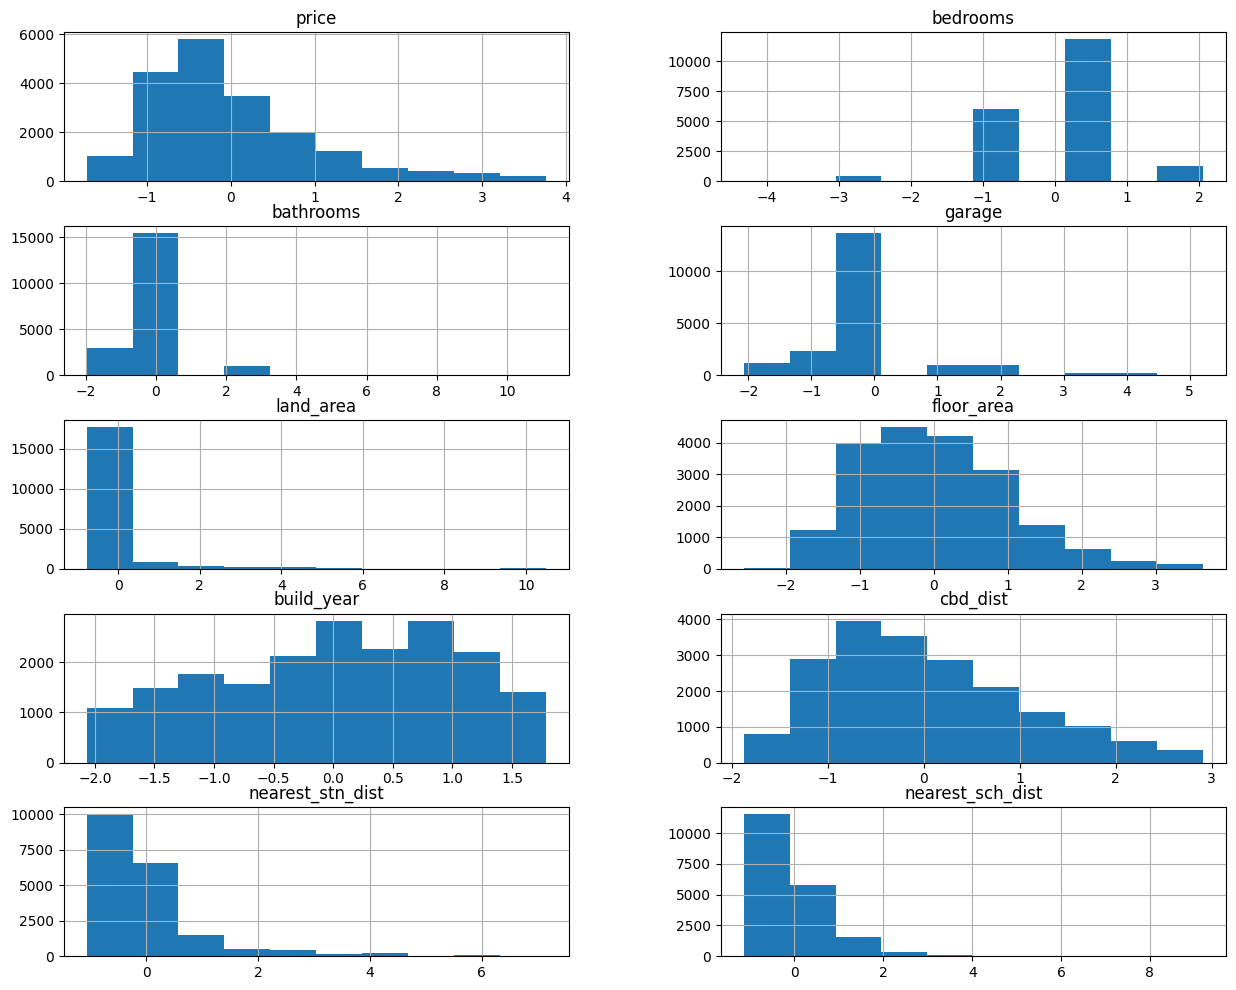

In [ ]:
#Визуализируем
df_standard.hist(figsize = (15,12), layout= (5,2));

## Нормализация

In [ ]:
#Обучаем и трансформируем
norm = MinMaxScaler()
norm.fit(df[num_columns]);
normolized = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normolized, columns= num_columns)
df_norm.head()

price  bedrooms  bathrooms    garage  land_area  floor_area  build_year  \
0  0.304329      0.75   0.166667  0.285714   0.050505    0.351351    0.621622   
1  0.157097      0.50   0.166667  0.285714   0.025354    0.294595    0.891892   
2  0.127650      0.75   0.000000  0.285714   0.036970    0.272973    0.486486   
3  0.189488      0.75   0.166667  0.142857   0.066566    0.237838    0.297297   
4  0.182862      0.50   0.166667  0.285714   0.028889    0.275676    0.918919   

   cbd_dist  nearest_stn_dist  nearest_sch_dist  
0  0.357837          0.055587          0.053059  
1  0.533158          0.153832          0.382022  
2  0.213096          0.061926          0.101156  
3  0.541312          0.030234          0.081001  
4  0.559660          0.115801          0.169162

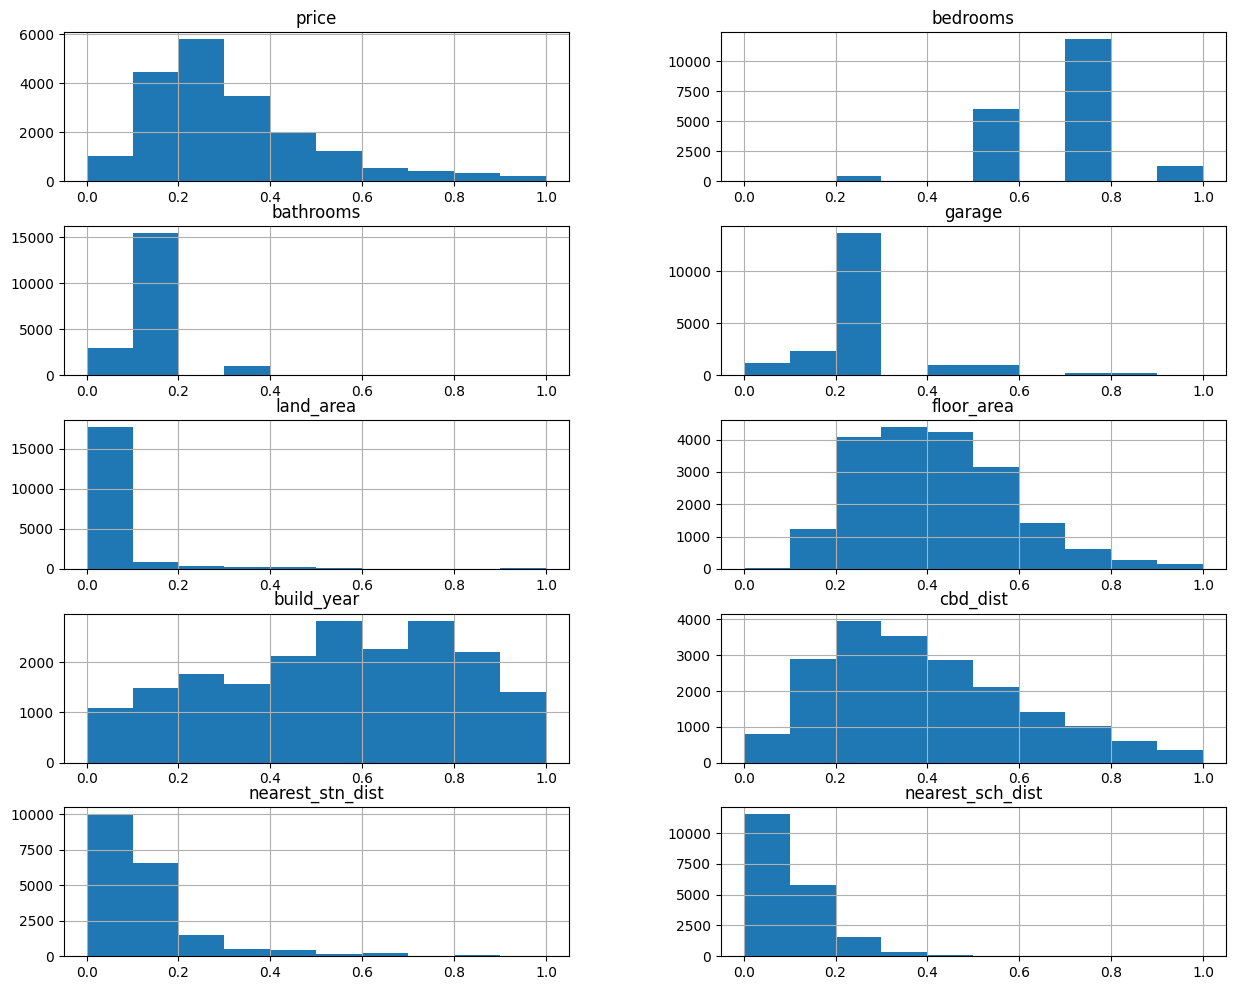

In [ ]:
#Визуализируем
df_norm.hist(figsize = (15,12), layout= (5,2));

## Степенное преобразование

In [ ]:
#Обучаем и трансформируем
pt=PowerTransformer()
pt.fit(df[num_columns]);
power = pt.transform(df[num_columns])
df_power = pd.DataFrame(power, columns= num_columns)
df_power.head()

price  bedrooms  bathrooms    garage  land_area  floor_area  build_year  \
0  0.169044  0.424569   0.188313  0.076898   0.071496   -0.286711    0.261967   
1 -0.926652 -1.141503   0.188313  0.076898  -1.060921   -0.699499    1.465676   
2 -1.224871  0.424569  -1.923461  0.076898  -0.429994   -0.869375   -0.270776   
3 -0.637165  0.424569   0.188313 -1.059335   0.491484   -1.163193   -0.947653   
4 -0.693530 -1.141503   0.188313  0.076898  -0.840716   -0.847714    1.597060   

   cbd_dist  nearest_stn_dist  nearest_sch_dist  
0 -0.009125         -0.611903         -0.732644  
1  0.758919          0.574377          2.088675  
2 -0.830813         -0.493137          0.228188  
3  0.790774         -1.249834         -0.112548  
4  0.861439          0.228395          1.010724

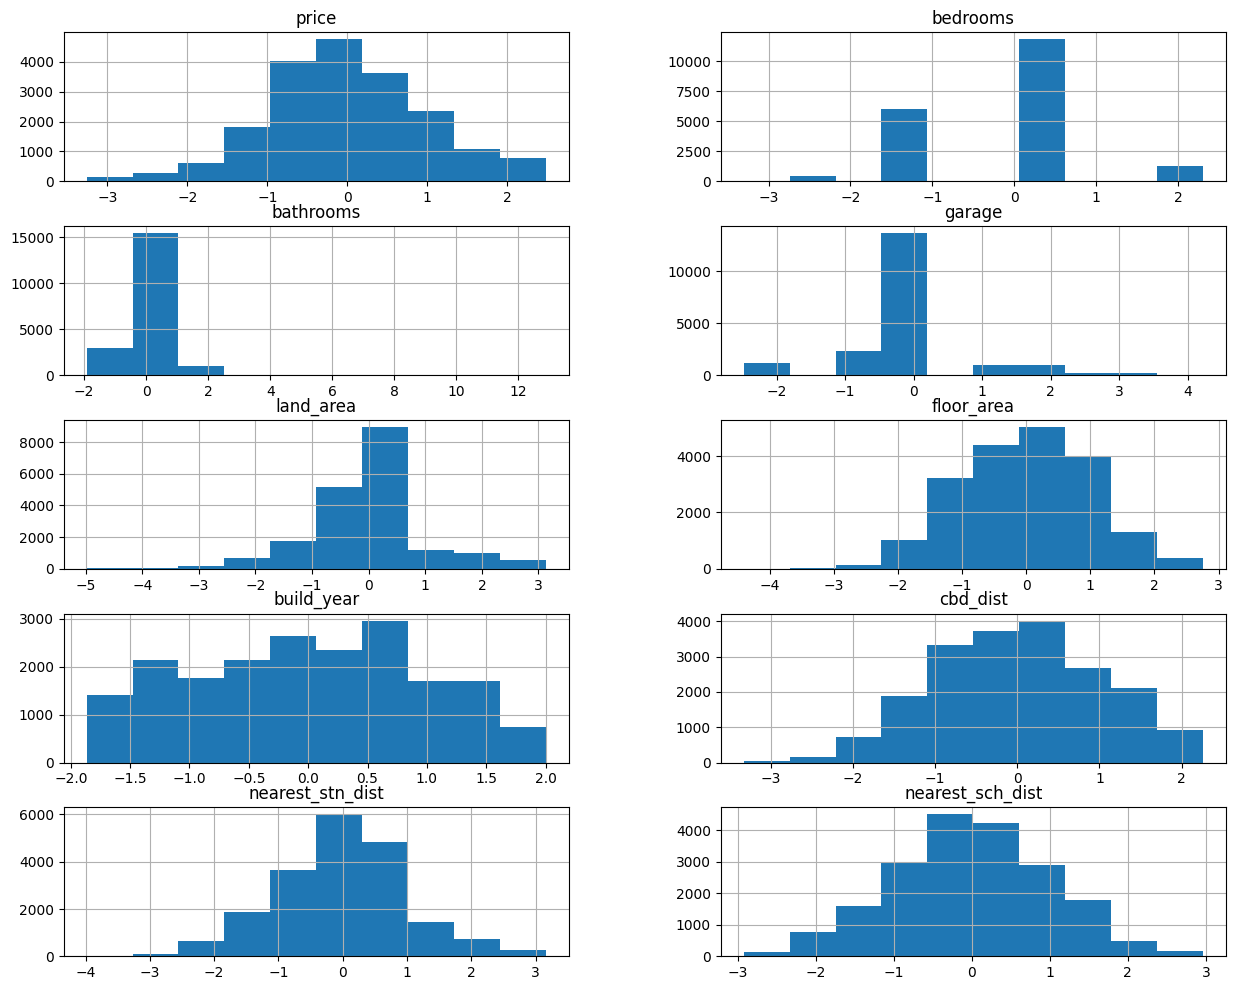

In [ ]:
#Визуализируем
df_power.hist(figsize = (15,12), layout= (5,2));

##Замена редких значений

In [ ]:
df.describe()

price      bedrooms     bathrooms        garage     land_area  \
count   19538.000000  19538.000000  19538.000000  19538.000000  19538.000000   
mean   381116.041990      3.710052      1.905569      1.991760    781.144692   
std    163693.073862      0.626587      0.458593      0.960756    878.707216   
min    100056.000000      1.000000      1.000000      0.000000    100.000000   
25%    270600.000000      3.000000      2.000000      2.000000    462.000000   
50%    342540.000000      4.000000      2.000000      2.000000    600.000000   
75%    452100.000000      4.000000      2.000000      2.000000    726.000000   
max    996600.000000      5.000000      7.000000      7.000000  10000.000000   

         floor_area    build_year      cbd_dist  nearest_stn_dist  \
count  19538.000000  19538.000000  19538.000000       19538.00000   
mean     183.239175   1999.858686  19998.379312        4130.54719   
std       59.508362      9.596179  10235.533554        3842.14680   
min       30.000000   1980.000000    747.000000          46.00000   
25%      138.000000   1993.000000  12200.000000        1800.00000   
50%      178.000000   2001.000000  18500.000000        3200.00000   
75%      222.000000   2007.000000  26600.000000        5000.00000   
max      400.000000   2017.000000  49800.000000       31600.00000   

       nearest_sch_dist  
count      19538.000000  
mean           1.650330  
std            1.380452  
min            0.070912  
25%            0.866812  
50%            1.311571  
75%            2.007694  
max           14.346056

In [ ]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [ ]:
qr = QuantileReplacer(threshold=0.01, )
qr.fit(df[num_columns])
DF_num_rare = qr.transform(df[num_columns])
DF_num_rare.describe()

price      bedrooms     bathrooms        garage     land_area  \
count   19538.000000  19538.000000  19538.000000  19538.000000  19538.000000   
mean   388648.314589      3.712509      1.902549      1.989764    801.606305   
std    168666.638224      0.617856      0.447045      0.951341    799.250506   
min    130680.000000      2.000000      1.000000      0.000000    194.000000   
25%    273900.000000      3.000000      2.000000      2.000000    467.000000   
50%    343200.000000      4.000000      2.000000      2.000000    601.000000   
75%    462000.000000      4.000000      2.000000      2.000000    731.000000   
max    917400.000000      5.000000      3.000000      6.000000   4600.890000   

         floor_area    build_year      cbd_dist  nearest_stn_dist  \
count  19538.000000  19538.000000  19538.000000      19538.000000   
mean     185.495342   1999.851725  19585.552564       4305.038080   
std       59.864597      9.584791   9969.762907       4017.881275   
min       80.000000   1980.000000   3600.000000        318.000000   
25%      139.000000   1993.000000  11900.000000       1900.000000   
50%      179.000000   2001.000000  18100.000000       3200.000000   
75%      224.000000   2007.000000  26200.000000       5100.000000   
max      350.000000   2015.000000  46800.000000      20663.000000   

       nearest_sch_dist  
count      19538.000000  
mean           1.667236  
std            1.197992  
min            0.232312  
25%            0.885295  
50%            1.331512  
75%            2.049664  
max            6.362574

#Предварительная обработка категориальных признаков

##Порядковое кодирование

In [ ]:
ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

address  suburb
0         48.0   252.0
1         63.0   274.0
2        207.0   167.0
3        227.0   198.0
4        331.0   126.0
...        ...     ...
19533   5770.0    75.0
19534   8156.0    12.0
19535   8645.0   184.0
19536   8857.0   250.0
19537   3475.0   250.0

[19538 rows x 2 columns]

##One-hot кодирование многозначных признаков

In [ ]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)
ohe.fit(df[cat_columns]);
ohe_feat = ohe.transform(df[cat_columns])
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)
df_ohe

address_ADLINGTON Way  address_ANSTIE WAY  address_ANTIBES COURT  \
0                          0                   0                      0   
1                          0                   0                      0   
2                          0                   0                      0   
3                          0                   0                      0   
4                          0                   0                      0   
...                      ...                 ...                    ...   
19533                      0                   0                      0   
19534                      0                   0                      0   
19535                      0                   0                      0   
19536                      0                   0                      0   
19537                      0                   0                      0   

       address_APPLETON Road  address_ARALUEN CRESCENT  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
...                      ...                       ...   
19533                      0                         0   
19534                      0                         0   
19535                      0                         0   
19536                      0                         0   
19537                      0                         0   

       address_ARDROSS Street  address_ARKANA WAY  address_ARTARMON RISE  \
0                           0                   0                      0   
1                           0                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   
...                       ...                 ...                    ...   
19533                       0                   0                      0   
19534                       0                   0                      0   
19535                       0                   0                      0   
19536                       0                   0                      0   
19537                       0                   0                      0   

       address_ARTHUR ROAD  address_ATHENS Road  ...  suburb_Willetton  \
0                        0                    0  ...                 0   
1                        0                    0  ...                 0   
2                        0                    0  ...                 0   
3                        0                    0  ...                 0   
4                        0                    0  ...                 0   
...                    ...                  ...  ...               ...   
19533                    0                    0  ...                 0   
19534                    0                    0  ...                 0   
19535                    0                    0  ...                 0   
19536                    0                    0  ...                 0   
19537                    0                    0  ...                 0   

       suburb_Wilson  suburb_Winthrop  suburb_Woodbridge  suburb_Woodlands  \
0                  0                0                  0                 0   
1                  0                0                  0                 0   
2                  0                0                  0                 0   
3                  0                0                  0                 0   
4                  0                0                  0                 0   
...              ...              ...                ...               ...   
19533              0                0                  0     

##Замена редких категориальных данных

In [ ]:
df[cat_columns].nunique()

address    9240
suburb      301
dtype: int64

In [ ]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.005, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [ ]:
rg = RareGrouper(threshold=0.0001, other_value='rare')
DF_cat_rare = rg.fit_transform(df[cat_columns])
DF_cat_rare.head()

address        suburb
0               rare    South Lake
1          Addis Way         Wandi
2               rare     Lockridge
3  Amethyst Crescent  Mount Richon
4               rare       Hilbert

In [ ]:
DF_cat_rare.nunique()

address    4164
suburb      297
dtype: int64

# Pipeline

## Создадим pipline для всех признаков

In [ ]:
#Исходя из распределений в итоговом результате и из распределений в обработке числовых признаков решил выбрать степенное преобразование и стандартизацию
#Для столбца с данными о расстоянии до близжайшей станции решил немного подрезать значения
num_pipe_price = Pipeline([
    ('power', PowerTransformer())
])
num_price = ['price']

num_pipe_bedrooms = Pipeline([
    ('scaler', StandardScaler())
])
num_bedrooms = ['bedrooms']

num_pipe_bathrooms = Pipeline([
    ('scaler', StandardScaler())
])
num_bathrooms = ['bathrooms']

num_pipe_garage = Pipeline([
    ('scaler', StandardScaler())
])
num_garage = ['garage']

num_pipe_land_area = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.001, )),
    ('power', PowerTransformer())
])
num_land_area = ['land_area']

num_pipe_floor_area = Pipeline([
    ('power', PowerTransformer())
])
num_floor_area = ['floor_area']

num_pipe_build_year = Pipeline([
    ('power', PowerTransformer())
])
num_build_year = ['build_year']

num_pipe_cbd_dist = Pipeline([
    ('power', PowerTransformer())
])
num_cbd_dist = ['cbd_dist']

num_pipe_nearest_stn_dist = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.001, )),
    ('power', PowerTransformer())
])
num_nearest_stn_dist = ['nearest_stn_dist']

num_pipe_nearest_sch_dist = Pipeline([
    ('power', PowerTransformer())
])
num_nearest_sch_dist = ['nearest_sch_dist']

In [ ]:
#Для категориальных решил использовать ohe, так как они слишком многозначны
cat_pipe_address = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_address = ['address']

cat_pipe_suburb = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_suburb = ['suburb']

## Объединяем в единый Трансформер Колонок Данных

In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('num_price', num_pipe_price, num_price),
    ('num_bedrooms', num_pipe_bedrooms, num_bedrooms),
    ('num_bathrooms', num_pipe_bathrooms, num_bathrooms),
    ('num_garage', num_pipe_garage, num_garage),
    ('num_land_area', num_pipe_land_area, num_land_area),
    ('num_floor_area', num_pipe_floor_area, num_floor_area),
    ('num_build_year', num_pipe_build_year, num_build_year),
    ('num_cbd_dist', num_pipe_cbd_dist, num_cbd_dist),
    ('num_nearest_stn_dist', num_pipe_nearest_stn_dist, num_nearest_stn_dist),
    ('num_nearest_sch_dist', num_pipe_nearest_sch_dist, num_nearest_sch_dist),
    ('cat_address', cat_pipe_address, cat_address),
    ('cat_suburb', cat_pipe_suburb, cat_suburb)
])

In [ ]:
preprocessors

ColumnTransformer(transformers=[('num_price',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['price']),
                                ('num_bedrooms',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['bedrooms']),
                                ('num_bathrooms',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['bathrooms']),
                                ('num_garage',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['garage']),
                                ('num_land_area',
                                 Pipe...
                                ('cat_address',
                                 Pipeline(steps=[('replace_rare',
                                                  RareGrouper(threshold=0.0001)),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['address']),
                                ('cat_suburb',
                                 Pipeline(steps=[('replace_rare',
                                                  RareGrouper(threshold=0.001)),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['suburb'])])

In [ ]:
preprocessors.fit(df);

In [ ]:
#Извлекаем имена признаков
cat_address_names = preprocessors.transformers_[10][1]['encoder'].get_feature_names_out(cat_address)
cat_suburb_names =  preprocessors.transformers_[11][1]['encoder'].get_feature_names_out(cat_suburb)

columns = np.hstack([num_price,
                    num_bedrooms,
                    num_bathrooms,
                    num_garage,
                    num_land_area,
                    num_floor_area,
                    num_build_year,
                    num_cbd_dist,
                    num_nearest_stn_dist,
                    num_nearest_sch_dist,
                    cat_address_names,
                    cat_suburb_names])

In [ ]:
#Трансформируем df исходя из преобразований числовых и категориальных данных
DF_transformed = preprocessors.transform(df)
pd.DataFrame(DF_transformed, columns=columns)

price  bedrooms  bathrooms    garage  land_area  floor_area  \
0      0.169044  0.462753   0.205921  0.008577   0.072260   -0.286711   
1     -0.926652 -1.133235   0.205921  0.008577  -1.049148   -0.699499   
2     -1.224871  0.462753  -1.974719  0.008577  -0.426069   -0.869375   
3     -0.637165  0.462753   0.205921 -1.032296   0.491958   -1.163193   
4     -0.693530 -1.133235   0.205921  0.008577  -0.832141   -0.847714   
...         ...       ...        ...       ...        ...         ...   
19533 -1.565993 -1.133235  -1.974719 -1.032296   1.193450   -2.009646   
19534 -0.552114 -1.133235   0.205921  0.008577  -1.917097   -1.406552   
19535 -0.303501  0.462753   0.205921  0.008577  -0.752932   -0.847714   
19536  1.430887 -1.133235   0.205921 -1.032296  -2.518894   -0.957309   
19537  1.630427  0.462753   2.386561  0.008577  -1.493799    1.049227   

       build_year  cbd_dist  nearest_stn_dist  nearest_sch_dist  ...  \
0        0.261967 -0.009125         -0.615125         -0.732644  ...   
1        1.465676  0.758919          0.573607          2.088675  ...   
2       -0.270776 -0.830813         -0.495252          0.228188  ...   
3       -0.947653  0.790774         -1.262506         -0.112548  ...   
4        1.597060  0.861439          0.228835          1.010724  ...   
...           ...       ...               ...               ...  ...   
19533   -0.762047  1.582140         -1.470541          0.471139  ...   
19534    1.209166  0.595229          0.763014          1.549790  ...   
19535    1.597060 -0.132485         -0.237423         -0.264106  ...   
19536   -0.372244 -0.250207         -0.553759         -0.238273  ...   
19537    1.465676 -0.239309         -0.819776          0.135202  ...   

       suburb_Willagee  suburb_Willetton  suburb_Wilson  suburb_Winthrop  \
0                  0.0               0.0            0.0              0.0   
1                  0.0               0.0            0.0              0.0   
2                  0.0               0.0            0.0              0.0   
3                  0.0               0.0            0.0              0.0   
4                  0.0               0.0            0.0              0.0   
...                ...               ...            ...              ...   
19533              0.0               0.0            0.0              0.0   
19534              0.0               0.0            0.0              0.0   
19535              0.0               0.0            0.0              0.0   
19536              0.0               0.0            0.0              0.0   
19537              0.0               0.0            0.0              0.0   

       suburb_Woodbridge  suburb_Woodlands  suburb_Woodvale  suburb_Yanchep  \
0                    0.0               0.0              0.0             0.0   
1                    0.0               0.0              0.0             0.0   
2                    0.0               0.0              0.0             0.0   
3                    0.0               0.0              0.0             0.0   
4                    0.0               0.0              0.0             0.0   
...                  ...               ...              ...             ...   
19533                0.0               0.0              0.0             0.0   
19534                0.0               0.0              0.0             0.0   
19535                0.0               0.0              0.0             0.0   
19536                0.0               0.0              0.0             0.0   
19537                0.0               0.0              0.0             0.0   

       suburb_Yangebup  suburb_Yokine  
0                  0.0            0.0  
1                  0.0            0.0  
2                  0.0            0.0  
3                  0.0            0.0  
4                  0.0            0.0  
...                ...            ...  
19533              0.0            0.0  
19534              0.0            0.0  
19535              0.0            0.0  
19536 

## Создадим pipeline отдельно для числовых признаков и общий pipeline

In [ ]:
preprocessors_num = ColumnTransformer(transformers=[
    ('num_bedrooms', num_pipe_bedrooms, num_bedrooms),
    ('num_bathrooms', num_pipe_bathrooms, num_bathrooms),
    ('num_garage', num_pipe_garage, num_garage),
    ('num_land_area', num_pipe_land_area, num_land_area),
    ('num_floor_area', num_pipe_floor_area, num_floor_area),
    ('num_build_year', num_pipe_build_year, num_build_year),
    ('num_cbd_dist', num_pipe_cbd_dist, num_cbd_dist),
    ('num_nearest_stn_dist', num_pipe_nearest_stn_dist, num_nearest_stn_dist),
    ('num_nearest_sch_dist', num_pipe_nearest_sch_dist, num_nearest_sch_dist)
])

preprocessors_all = ColumnTransformer(transformers=[
    ('num_bedrooms', num_pipe_bedrooms, num_bedrooms),
    ('num_bathrooms', num_pipe_bathrooms, num_bathrooms),
    ('num_garage', num_pipe_garage, num_garage),
    ('num_land_area', num_pipe_land_area, num_land_area),
    ('num_floor_area', num_pipe_floor_area, num_floor_area),
    ('num_build_year', num_pipe_build_year, num_build_year),
    ('num_cbd_dist', num_pipe_cbd_dist, num_cbd_dist),
    ('num_nearest_stn_dist', num_pipe_nearest_stn_dist, num_nearest_stn_dist),
    ('num_nearest_sch_dist', num_pipe_nearest_sch_dist, num_nearest_sch_dist),
    ('cat_address', cat_pipe_address, cat_address),
    ('cat_suburb', cat_pipe_suburb, cat_suburb)
])

In [ ]:
#Объединяем названия колонок в один список
columns_num = np.hstack([num_bedrooms,
                        num_bathrooms,
                        num_garage,
                        num_land_area,
                        num_floor_area,
                        num_build_year,
                        num_cbd_dist,
                        num_nearest_stn_dist,
                        num_nearest_sch_dist
                        ])

# Линейная Регрессия

In [ ]:
#Удаляем целевую переменную из df
X,y = df.drop(columns = ['price']), df['price']

#Разбиваем df на тестовую и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
X_train

address        suburb  bedrooms  bathrooms  garage  \
4127          Cumbor Way        Samson         4          2     2.0   
14251      Mustang Drive  Henley Brook         4          2     2.0   
9507       Boronia Court      Thornlie         4          2     2.0   
13060      Alsace Avenue     Caversham         3          2     1.0   
5707   Newborough Street     Karrinyup         3          2     2.0   
...                  ...           ...       ...        ...     ...   
11284  Shoalwater Street  North Coogee         4          2     2.0   
11964        Bafile Lane       Beeliar         4          2     2.0   
5390          Arley Turn  Canning Vale         4          2     2.0   
860      Perugino Avenue     Landsdale         4          2     2.0   
15795        Nankeen Way        Gwelup         3          2     2.0   

       land_area  floor_area  build_year  cbd_dist  nearest_stn_dist  \
4127         857         231      1985.0     14500              5300   
14251        623         159      2001.0     20400             11200   
9507         690         154      1992.0     16200              3400   
13060        607         107      2002.0     13700              3700   
5707         306         231      2014.0     10300              2200   
...          ...         ...         ...       ...               ...   
11284        300         231      2012.0     17300              3300   
11964        560         208      2010.0     20800              5400   
5390         713         317      1999.0     16600              4800   
860          590         228      2014.0     15100              8100   
15795        550         205      2004.0     11200              2400   

       nearest_sch_dist  
4127           0.241300  
14251          1.241891  
9507           1.716217  
13060          2.917645  
5707           1.596386  
...                 ...  
11284          1.861036  
11964          2.360508  
5390           1.136857  
860            1.159759  
15795          1.713501  

[13676 rows x 11 columns]

## Оценим модель с использованием только числовых данных

Преобразуем данные и обучаем модель

In [ ]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

In [ ]:
model = SGDRegressor(random_state = 42)
model.fit(X_train_prep, y_train);

### Подготовим несколько функций для анализа обученной модели

In [ ]:
def get_coefs (model):
    B0=model.intercept_[0]
    B=model.coef_
    return B0, B

In [ ]:
def print_model (B0,B,features_names):
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

In [ ]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    numbers = np.arange(0,len(weights))
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers]
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

### Уравнение модели

In [ ]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
382521.240-22145.55*bedrooms+19560.30*bathrooms+5286.56*garage+5092.05*land_area+105328.82*floor_area-17151.20*build_year-61546.49*cbd_dist-10829.35*nearest_stn_dist+2713.85*nearest_sch_dist


In [ ]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Исходя из графика можно уже сделать выводы:
*   количество спален, год постройки, расстояние до близжайшего центра и расстояние до близжайшей станции негативно влияют на цену (причем расстояние до близжайшего центра имеет наибольший отрицательный вес)
*   остальные признаки позитивно влияют на модель (наибольший вес у признака площади дома)



### Оценка метрик

In [ ]:
def calculate_metric(model_pipe, X, y, metric = r2_score, **kwargs):
    y_model = model_pipe.predict(X)
    return metric(y, y_model, **kwargs)

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.5738
r2 на валидационной выборке: 0.5604
mse на тренировочной выборке: 11533942187.0950
mse на валидационной выборке: 11504349222.1745
rmse на тренировочной выборке: 107396.1926
rmse на валидационной выборке: 107258.3294


### Кросс-валидация

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [ ]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [ ]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


fit_time  score_time   test_R2     test_-MSE     test_-MAE      test_-Max
0  0.028934    0.002396  0.591903 -1.182967e+10 -78197.666282 -929371.768813
1  0.025232    0.002372  0.575905 -1.141298e+10 -79186.170439 -500783.538216
2  0.051735    0.002405  0.505450 -1.260471e+10 -80316.845439 -921649.028913
3  0.028841    0.002373  0.586680 -1.043202e+10 -75820.507588 -458620.496632
4  0.033532    0.002372  0.538212 -1.216393e+10 -79061.389188 -925628.775793



test_R2      5.596299e-01
test_-MSE   -1.168866e+10
test_-MAE   -7.851652e+04
test_-Max   -7.472107e+05
dtype: float64


### Визуализация ошибок

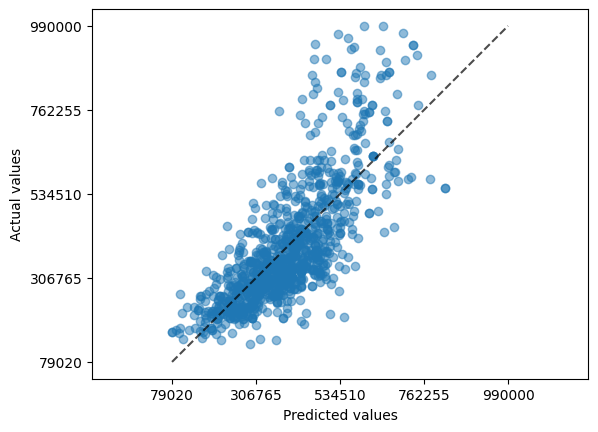

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

**Выводы по модели**:

* используя 9 числовых признаков предсказания имеют сильную погрешность (50/50)

* есть проблемы предсказания высоких цен

* модель выглядит "логично": рост площади дома и участка, количества ванн и мест под машины положительно сказываются на модели, а расстояния до центра и станции негативно влияют на модель
* однако есть странности, которые ломают "логичность": количество спален и рост года постройки негативно влияют на модель. Возможно рост количества спален не особо важен для цены т.к. большое количество спален просто не нужно для покупателей. Возможно покупатели предпочитают уже построенные дома, проверенные временем.


## Объединяем Pipeline предобработки и Модель

In [ ]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', SGDRegressor(random_state = 42))
])

In [ ]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_bedrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms']),
                                                 ('num_bathrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms']),
                                                 ('num_garage',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['garage']),
                                                 ('num_land_area',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileRe...
                                                 ('num_cbd_dist',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['cbd_dist']),
                                                 ('num_nearest_stn_dist',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.001)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['nearest_stn_dist']),
                                                 ('num_nearest_sch_dist',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['nearest_sch_dist'])])),
                ('model', SGDRegressor(random_state=42))])

### Уравнение модели

In [ ]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
382521.240-22145.55*bedrooms+19560.30*bathrooms+5286.56*garage+5092.05*land_area+105328.82*floor_area-17151.20*build_year-61546.49*cbd_dist-10829.35*nearest_stn_dist+2713.85*nearest_sch_dist


### Оценка метрик

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.5738
r2 на валидационной выборке: 0.5604
mse на тренировочной выборке: 11533942187.0950
mse на валидационной выборке: 11504349222.1745
rmse на тренировочной выборке: 107396.1926
rmse на валидационной выборке: 107258.3294


### Кросс-валидация

In [ ]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


fit_time  score_time   test_R2     test_-MSE     test_-MAE      test_-Max
0  0.171525    0.026741  0.591477 -1.184202e+10 -78228.611239 -934020.447951
1  0.210642    0.022713  0.575545 -1.142264e+10 -79217.144941 -500750.848533
2  0.226292    0.023368  0.505021 -1.261564e+10 -80358.198063 -928524.373715
3  0.200943    0.022998  0.586662 -1.043247e+10 -75821.425241 -458633.751584
4  0.189473    0.025600  0.537576 -1.218070e+10 -79119.051518 -930041.104515



test_R2      5.592562e-01
test_-MSE   -1.169869e+10
test_-MAE   -7.854889e+04
test_-Max   -7.503941e+05
dtype: float64


## Оценим влияние предварительной обработки целевой переменной

In [ ]:
from sklearn.compose import TransformedTargetRegressor

In [ ]:
pipe_num_transform = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [ ]:
pipe_num_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_bedrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms']),
                                                 ('num_bathrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms']),
                                                 ('num_garage',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['garage']),
                                                 ('num_land_area',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileRe...
                                                 ('num_nearest_stn_dist',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.001)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['nearest_stn_dist']),
                                                 ('num_nearest_sch_dist',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['nearest_sch_dist'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

### Уравнение модели

In [ ]:
B0, B = get_coefs(pipe_num_transform['model'].regressor_)
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
-0.009-0.10*bedrooms+0.12*bathrooms+0.05*garage+0.04*land_area+0.62*floor_area-0.11*build_year-0.39*cbd_dist-0.05*nearest_stn_dist+0.05*nearest_sch_dist


In [ ]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Исходя из графика можем увидеть те же выводы, которые были сделаны раннее

### Оценка метрик

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.5813
r2 на валидационной выборке: 0.5694
mse на тренировочной выборке: 11330323922.6873
mse на валидационной выборке: 11268133136.0586
rmse на тренировочной выборке: 106443.9943
rmse на валидационной выборке: 106151.4632


### Кросс-валидация

In [ ]:
cross_validation (X_train, y_train,
                  pipe_num_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


fit_time  score_time   test_R2     test_-MSE     test_-MAE      test_-Max
0  0.187352    0.026724  0.612000 -1.124712e+10 -73276.827147 -736304.591965
1  0.216600    0.024008  0.591849 -1.098390e+10 -73719.080523 -529394.464707
2  0.227879    0.024372  0.511801 -1.244284e+10 -76245.950694 -737877.782217
3  0.221827    0.023956  0.608908 -9.870995e+09 -69498.901483 -495593.999433
4  0.192747    0.022266  0.546303 -1.195081e+10 -74810.089135 -735810.156914



test_R2      5.741720e-01
test_-MSE   -1.129913e+10
test_-MAE   -7.351017e+04
test_-Max   -6.469962e+05
dtype: float64


### Визуализация ошибок

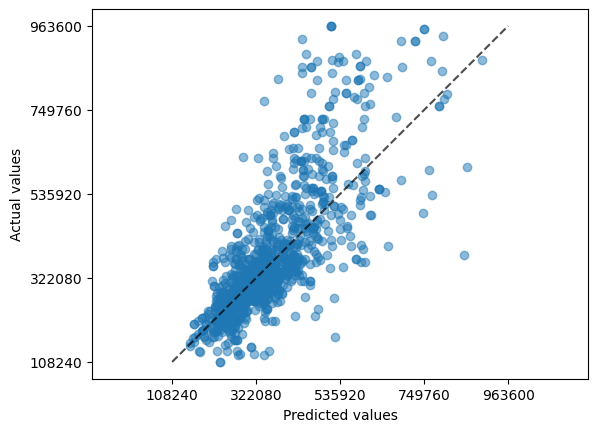

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_num_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

**Выводы по модели**:
* предварительная обработка целевой переменной совсем немного улучшила результаты линейной модели (с 0.5738 до 0.5813)
* предварительная обработка целевой переменной не помогла с проблемой предсказания больших цен
* модель всё ещё выглядит "логично" (если будем интерпритировать отрицательные веса как раньше)

## Оценим влияние категориальных признаков

In [ ]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [ ]:
pipe_all_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_bedrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms']),
                                                 ('num_bathrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms']),
                                                 ('num_garage',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['garage']),
                                                 ('num_land_area',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileRe...
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['address']),
                                                 ('cat_suburb',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['suburb'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [ ]:
cat_address_names = preprocessors.transformers_[10][1]['encoder'].get_feature_names_out(cat_address)
cat_suburb_names =  preprocessors.transformers_[11][1]['encoder'].get_feature_names_out(cat_suburb)

columns = np.hstack([num_price,
                    num_bedrooms,
                    num_bathrooms,
                    num_garage,
                    num_land_area,
                    num_floor_area,
                    num_build_year,
                    num_cbd_dist,
                    num_nearest_stn_dist,
                    num_nearest_sch_dist,
                    cat_address_names,
                    cat_suburb_names])

### Уравнение модели

In [ ]:
B0, B = get_coefs(pipe_all_transform['model'].regressor_)
features_names = list(columns)

print_model (B0,B,features_names)

Решение
0.022-0.04*price+0.09*bedrooms+0.04*bathrooms+0.07*garage+0.52*land_area-0.05*floor_area-0.44*build_year-0.02*cbd_dist+0.04*nearest_stn_dist-0.01*nearest_sch_dist+0.00*address_APPLETON Road-0.00*address_Abadan Road-0.00*address_Abba Place+0.00*address_Abbett Street+0.01*address_Abbey Court-0.00*address_Abbey Green Road+0.05*address_Abitibi Turn+0.04*address_Abraham Place+0.00*address_Abrolhos Loop-0.00*address_Acapulco Way-0.01*address_Accra Way+0.01*address_Acheson Crescent-0.00*address_Achiever Avenue+0.01*address_Acton Avenue+0.02*address_Ada Street+0.00*address_Adamson Road-0.00*address_Adana Elbow-0.01*address_Addis Way+0.01*address_Addlewell Glen+0.01*address_Adelong Circuit-0.00*address_Adelphi Court-0.02*address_Adenia Road-0.03*address_Adenine Bend-0.02*address_Adler Street+0.01*address_Admiralty Road-0.01*address_Adonis Street-0.01*address_Adriatic Way-0.00*address_Aerial Place-0.01*address_Aerolite Way+0.01*address_Agasse Way+0.02*address_Agate Way-0.01*address_Aginc

In [ ]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [ ]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 0.08, width = 1800)

### Оценка метрик

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.7613
r2 на валидационной выборке: 0.7322
mse на тренировочной выборке: 6458508771.0463
mse на валидационной выборке: 7008776163.6345
rmse на тренировочной выборке: 80364.8479
rmse на валидационной выборке: 83718.4338


### Кросс-валидация

In [ ]:
cross_validation (X_train, y_train,
                  pipe_all_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


fit_time  score_time   test_R2     test_-MSE     test_-MAE      test_-Max
0  6.073288    0.171983  0.753239 -7.152951e+09 -55359.309550 -697433.044351
1  5.626987    0.095551  0.747832 -6.786170e+09 -55335.171940 -500649.164928
2  4.813639    0.096243  0.683128 -8.076185e+09 -58121.115501 -697688.521207
3  6.077806    0.162570  0.757755 -6.114152e+09 -52915.645790 -387500.573425
4  5.541067    0.094101  0.714338 -7.524595e+09 -56336.808196 -698780.512236



test_R2      7.312587e-01
test_-MSE   -7.130810e+09
test_-MAE   -5.561361e+04
test_-Max   -5.964104e+05
dtype: float64


### Визуализация ошибок

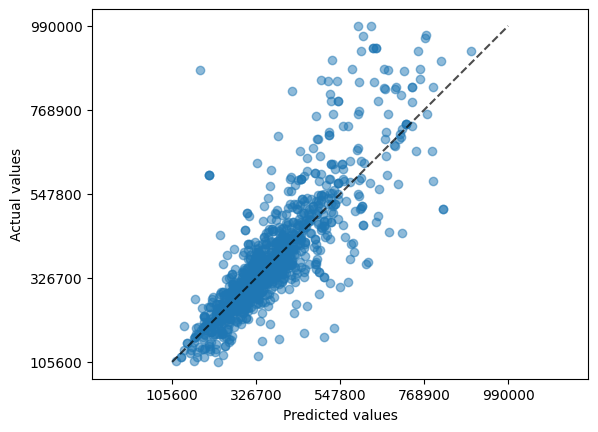

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

**Выводы по модели**:

* добавление категориальных признаков улучшает результаты линейной модели значительно улучшает модель (с 0.5813 до 0.7613)

* предсказание цен на дорогие дома немного улучшилось

* интерпритация категориальных признаков: название популряных/спокойных улиц положительно влияет на модель

# Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import PredictionErrorDisplay

In [ ]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [ ]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [ ]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.target_mean = {}

    def fit(self, X, y):
        if self.cols is None:
            self.cols = X.columns
        for col in self.cols:
            self.target_mean[col] = {}
            X_copy = X.copy()
            X_copy[y.name]=y
            self.target_mean[col] = X_copy.groupby(col)[y.name].mean().to_dict()
        return self

    def transform(self, X):
        for col in self.cols:
            X[col] = X[col].map(self.target_mean[col])
            X[col] = X[col].fillna(np.mean(X[col]))
        return X

## Перепишем Pipline

In [ ]:
#Для числовых признаков
num_pipe_bedrooms = Pipeline([
    ('scaler', None)
])
num_bedrooms = ['bedrooms']

num_pipe_bathrooms = Pipeline([
    ('scaler', None)
])
num_bathrooms = ['bathrooms']

num_pipe_garage = Pipeline([
    ('scaler', None)
])
num_garage = ['garage']

num_pipe_land_area = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.001, )),
    ('power',None)
])
num_land_area = ['land_area']

num_pipe_floor_area = Pipeline([
    ('power', None)
])
num_floor_area = ['floor_area']

num_pipe_build_year = Pipeline([
    ('power', None)
])
num_build_year = ['build_year']

num_pipe_cbd_dist = Pipeline([
    ('power', None)
])
num_cbd_dist = ['cbd_dist']

num_pipe_nearest_stn_dist = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.001, )),
    ('power', None)
])
num_nearest_stn_dist = ['nearest_stn_dist']

num_pipe_nearest_sch_dist = Pipeline([
    ('power', None)
])
num_nearest_sch_dist = ['nearest_sch_dist']

#Для категориальных признаков
cat_pipe_address = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
    ('encoder', TargetEncoder())
])
cat_address = ['address']

cat_pipe_suburb = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.001, other_value='Other')),
    ('encoder', TargetEncoder())
])
cat_suburb = ['suburb']

In [ ]:
#Снова делаем общий и числовой
preprocessors_num = ColumnTransformer(transformers=[
    ('num_bedrooms', num_pipe_bedrooms, num_bedrooms),
    ('num_bathrooms', num_pipe_bathrooms, num_bathrooms),
    ('num_garage', num_pipe_garage, num_garage),
    ('num_land_area', num_pipe_land_area, num_land_area),
    ('num_floor_area', num_pipe_floor_area, num_floor_area),
    ('num_build_year', num_pipe_build_year, num_build_year),
    ('num_cbd_dist', num_pipe_cbd_dist, num_cbd_dist),
    ('num_nearest_stn_dist', num_pipe_nearest_stn_dist, num_nearest_stn_dist),
    ('num_nearest_sch_dist', num_pipe_nearest_sch_dist, num_nearest_sch_dist)
])

preprocessors_all = ColumnTransformer(transformers=[
    ('num_bedrooms', num_pipe_bedrooms, num_bedrooms),
    ('num_bathrooms', num_pipe_bathrooms, num_bathrooms),
    ('num_garage', num_pipe_garage, num_garage),
    ('num_land_area', num_pipe_land_area, num_land_area),
    ('num_floor_area', num_pipe_floor_area, num_floor_area),
    ('num_build_year', num_pipe_build_year, num_build_year),
    ('num_cbd_dist', num_pipe_cbd_dist, num_cbd_dist),
    ('num_nearest_stn_dist', num_pipe_nearest_stn_dist, num_nearest_stn_dist),
    ('num_nearest_sch_dist', num_pipe_nearest_sch_dist, num_nearest_sch_dist),
    ('cat_address', cat_pipe_address, cat_address),
    ('cat_suburb', cat_pipe_suburb, cat_suburb)
])

In [ ]:
columns_num = np.hstack([num_bedrooms,
                        num_bathrooms,
                        num_garage,
                        num_land_area,
                        num_floor_area,
                        num_build_year,
                        num_cbd_dist,
                        num_nearest_stn_dist,
                        num_nearest_sch_dist
                        ])

In [ ]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

## Оценим модель с использованием только числовых данных

In [ ]:
model_dt = DecisionTreeRegressor(max_leaf_nodes=40,
                              min_samples_split=5,
                              criterion = 'absolute_error'
                              )

model_dt.fit(X_train_prep, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_leaf_nodes=40,
                      min_samples_split=5)

In [ ]:
def feature_importance_plotter(model, features_names):
    feature_importance = model.feature_importances_

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(10,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

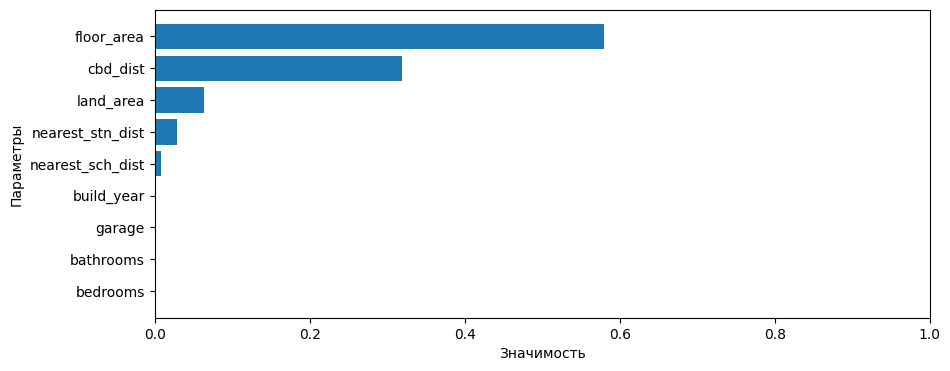

In [ ]:
feature_importance_plotter(model_dt, columns_num)

Исходя из графика можно сделать выводы:
*  самые значимые признаки при выборе дома это площадь дома на участке и расстояние до близжайшего центра
*  самые незначимые признаки это количество спален и душевых

### Оценка метрик

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(model_dt, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model_dt, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model_dt, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model_dt, X_val_prep, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.6027
r2 на валидационной выборке: 0.5583
mse на тренировочной выборке: 10751988515.6831
mse на валидационной выборке: 11559745499.3939


### Кросс-валидация

In [ ]:
cross_validation (X_train_prep, y_train,
                  model_dt,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


fit_time  score_time   test_R2     test_-MSE     test_-MAE  test_-Max
0  4.952624    0.002673  0.607996 -1.136317e+10 -71779.085439  -663960.0
1  5.001897    0.002509  0.602479 -1.069782e+10 -71562.248421  -523050.0
2  5.165902    0.001956  0.526643 -1.206456e+10 -72761.423553  -623700.0
3  4.295485    0.002897  0.577291 -1.066899e+10 -70023.374474  -541200.0
4  4.977929    0.001878  0.554649 -1.173096e+10 -73977.633246  -617100.0



test_R2      5.738118e-01
test_-MSE   -1.130510e+10
test_-MAE   -7.202075e+04
test_-Max   -5.938020e+05
dtype: float64


###Визуализация ошибок

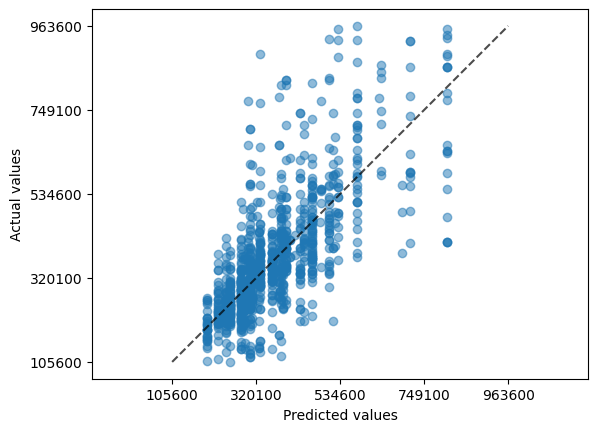

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model_dt.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

**Выводы по модели**

* в сравнении с линейной регрессией в тех же условиях (только числовые признаки, целевая переменная не предобраотана) модель деревьев решений показывает метрики немного лучше (0.6027 против 0.5738). Однако стоит отметить, что на валидационной выборке результат показывает хуже.
* признаки связанные с количество спален, ванных, гараже и годом постройки оказываются бесполезными

## Оценим влияние категориальных признаков

In [ ]:
pipe_all = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', DecisionTreeRegressor(max_leaf_nodes=40,
                              min_samples_split=5,
                              criterion = 'absolute_error'
                              )
    )
])

In [ ]:
pipe_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_bedrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   None)]),
                                                  ['bedrooms']),
                                                 ('num_bathrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   None)]),
                                                  ['bathrooms']),
                                                 ('num_garage',
                                                  Pipeline(steps=[('scaler',
                                                                   None)]),
                                                  ['garage']),
                                                 ('num_land_area',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.001)),
                                                                  ('power',
                                                                   No...
                                                  ['nearest_sch_dist']),
                                                 ('cat_address',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['address']),
                                                 ('cat_suburb',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.001)),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['suburb'])])),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       max_leaf_nodes=40,
                                       min_samples_split=5))])

### Оценка метрик

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.8100
r2 на валидационной выборке: 0.7384
mse на тренировочной выборке: 5142771434.7925
mse на валидационной выборке: 6846559828.4563


### Кросс-валидация

In [ ]:
cross_validation (X_train, y_train,
                  pipe_all,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


fit_time  score_time   test_R2     test_-MSE     test_-MAE  test_-Max
0  4.759030    0.062738  0.742714 -7.458041e+09 -57379.825877  -580800.0
1  8.550963    0.061621  0.749744 -6.734721e+09 -55449.831491  -517440.0
2  4.725962    0.070442  0.714567 -7.274881e+09 -56883.990504  -600600.0
3  4.791171    0.105709  0.738722 -6.594542e+09 -54731.546930  -507375.0
4  6.684820    0.109484  0.728712 -7.145984e+09 -55472.884211  -603900.0



test_R2      7.348920e-01
test_-MSE   -7.041634e+09
test_-MAE   -5.598362e+04
test_-Max   -5.620230e+05
dtype: float64


###Визуализация ошибок

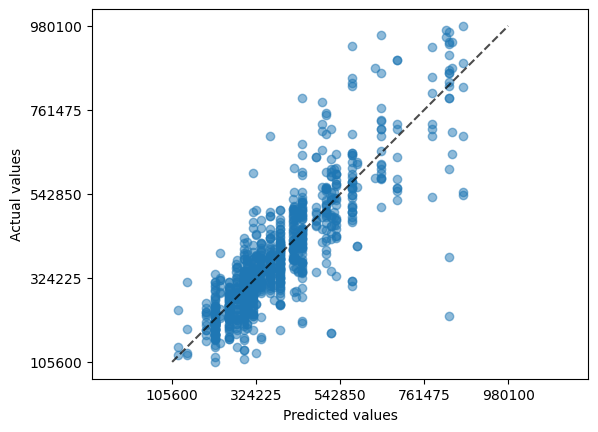

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

In [ ]:
columns = np.hstack([num_bedrooms,
                    num_bathrooms,
                    num_garage,
                    num_land_area,
                    num_floor_area,
                    num_build_year,
                    num_cbd_dist,
                    num_nearest_stn_dist,
                    num_nearest_sch_dist,
                    cat_address,
                    cat_suburb
                    ])

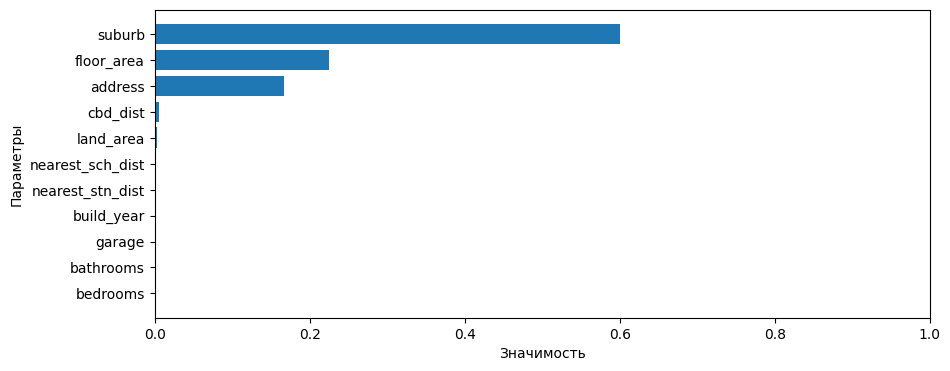

In [ ]:
feature_importance_plotter(pipe_all['model'], columns)

Небольшие выводы

* добавление категориальных признаков положительно сказывается на предсказании (с 0.6027 до 0.81)
* Наиболее значимыми признаками оказались пригород, улица и размер дома на участке
* Менее значимыми - расстояние до близжайшего центра, площадь участка
* Бесполезными - расстояние до близжайшей школы и станции, год постройки, количество мест для машин, ванных и спален

## Попробуем улучшить модель

In [ ]:
pipe_all_2 = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', DecisionTreeRegressor(max_leaf_nodes=1500,
                              min_samples_split=45,
                              criterion = 'absolute_error'
                              )
    )
])

In [ ]:
pipe_all_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_bedrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   None)]),
                                                  ['bedrooms']),
                                                 ('num_bathrooms',
                                                  Pipeline(steps=[('scaler',
                                                                   None)]),
                                                  ['bathrooms']),
                                                 ('num_garage',
                                                  Pipeline(steps=[('scaler',
                                                                   None)]),
                                                  ['garage']),
                                                 ('num_land_area',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.001)),
                                                                  ('power',
                                                                   No...
                                                  ['nearest_sch_dist']),
                                                 ('cat_address',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['address']),
                                                 ('cat_suburb',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.001)),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['suburb'])])),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       max_leaf_nodes=1500,
                                       min_samples_split=45))])

### Оценка метрик

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_2, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_2, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_2, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_2, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.8943
r2 на валидационной выборке: 0.7594
mse на тренировочной выборке: 2861364314.6348
mse на валидационной выборке: 6297158965.1092


### Кросс-валидация

In [ ]:
cross_validation (X_train, y_train,
                  pipe_all_2,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


fit_time  score_time   test_R2     test_-MSE     test_-MAE  test_-Max
0  10.145677    0.120020  0.767515 -6.739129e+09 -53564.180855  -536250.0
1   5.819940    0.060881  0.765670 -6.306134e+09 -52232.383114  -481800.0
2  10.277709    0.607282  0.736841 -6.707195e+09 -52534.809057  -633600.0
3  10.441476    0.127230  0.774667 -5.687296e+09 -50958.203662  -445500.0
4   6.826767    0.112823  0.735760 -6.960336e+09 -54156.230285  -646965.0



test_R2      7.560907e-01
test_-MSE   -6.480018e+09
test_-MAE   -5.268916e+04
test_-Max   -5.488230e+05
dtype: float64


### Визуализация ошибок

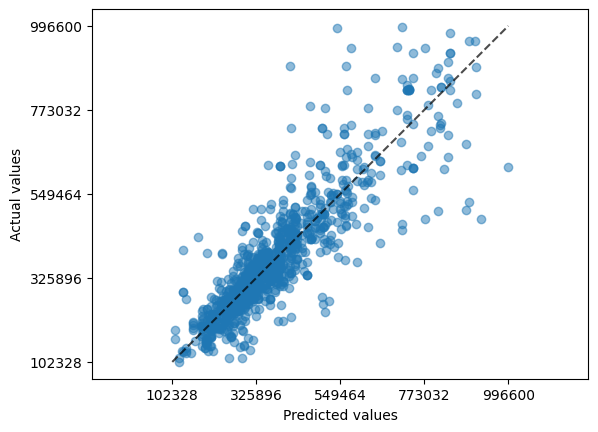

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_2.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

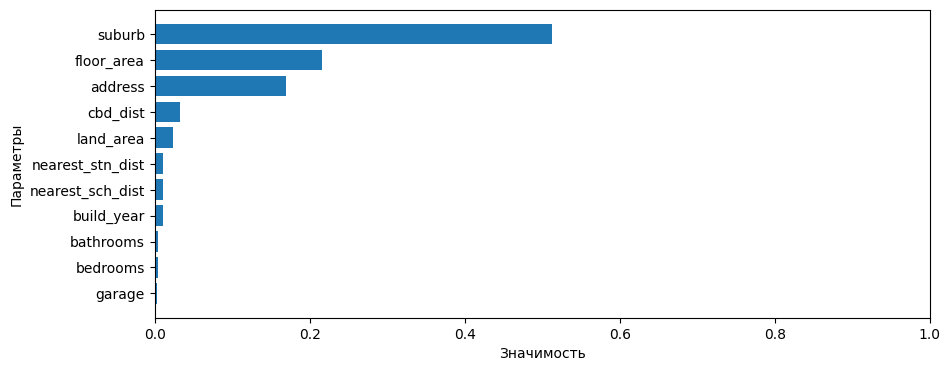

In [ ]:
feature_importance_plotter(pipe_all_2['model'], columns)

Небольшие выводы

* добавление количества листьев и разделений положительно сказывается на предсказании (с 0.81 до 0.8943)
* Наиболее значимыми признаками оказались пригород, улица и размер дома на участке
* Менее значимыми - расстояние до близжайшего центра, площадь участка, расстояние до близжайшей школы и станции, год постройки
* Незначимые - количество мест для машин, ванных и спален